## Install packages

In [3]:
!pip install pandas
!pip install folium
!pip install matplotlib

In [4]:
# import packages needed
import json
import fetch
import matplotlib.pyplot as plt
import folium
import pandas as pd

## Fetch data from backend

In [5]:
weather = fetch.fetch_all_data("http://127.0.0.1:9090", '/weather/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [6]:
liquor_venues = fetch.fetch_all_data("http://127.0.0.1:9090", '/liquor/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [7]:
mastodon = fetch.fetch_all_data("http://127.0.0.1:9090", '/mastodon/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [8]:
accidents = fetch.fetch_all_data("http://127.0.0.1:9090", '/accidents/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [9]:
sensors = fetch.fetch_all_data("http://127.0.0.1:9090", '/sensors/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 recor

In [10]:
# extract infomation (formatting) from response json
def extract_info(data):
    extracted_info = []
    for item in data:
        extracted_info.append(item["_source"])
    
    return extracted_info



In [11]:
extracted_liquor_venues = extract_info(liquor_venues)
extracted_accidents = extract_info(accidents)
extracted_weather = extract_info(weather)
extracted_mastodon = extract_info(mastodon)
extracted_sensors = extract_info(sensors)

## Visualise the relationship between the location of car crashes and the location of pubs

In [12]:

# venues with licence type of general, on-premises, packaged
licence_type = "On-Premises Licence"

liquor_venues_df = pd.DataFrame(extracted_liquor_venues)
liquor_venues_df = pd.DataFrame(liquor_venues_df[liquor_venues_df["lga"] != 'MELBOURNE'])
liquor_venues_df = pd.DataFrame(liquor_venues_df[liquor_venues_df["licence_category"] == licence_type])

m = folium.Map(location=[-37.82621898518443, 144.99324161582476], zoom_start=14)

for index, row in liquor_venues_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['premises_name'],
        icon=folium.Icon(icon='info-sign')
    ).add_to(m)



In [13]:
from folium.plugins import HeatMap

accidents_df = pd.DataFrame(extracted_accidents)
# exclude the crashes happened in city
accidents_df = accidents_df[accidents_df['lga_name'] != 'MELBOURNE']

# filter the crashes happened in alcohol time
accidents_df = accidents_df[accidents_df['alcoholtime'] == 'Yes']


locations = accidents_df[['latitude', 'longitude']]

# Drop any rows with missing values in these columns
locations = locations.dropna()

# Convert to a list of lists
location_data = locations.values.tolist()

# Add the heat map layer
HeatMap(location_data).add_to(m)


m

In [14]:
weather_df = pd.DataFrame(extracted_weather)

# Split data by date
weather_df['date'] = weather_df['date_measure'].str.split('T').str[0]

#  Group and aggregate by date
aggregated_data = weather_df.groupby('date').agg({
    'RTC': 'first',  
    'battery': 'mean',
    'solarPanel': 'mean',
    'precipitation': 'sum',
    'strikes': 'sum',
    'windSpeed': 'mean',
    'windDirection': 'mean',
    'gustSpeed': 'max',
    'vapourPressure': 'mean',
    'atmosphericPressure': 'mean',
    'relativeHumidity': 'mean',
    'airTemp': 'max',
    'Location': 'first',
    'Sensor_Name': 'first'
}).reset_index()


# filter 2024 weather data
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
weather_2024 = aggregated_data[aggregated_data['date'].dt.year == 2024]



In [15]:
pedestrian_df = pd.DataFrame(extracted_sensors)
pedestrian_df['date'] = pedestrian_df['SensingDateTime(Hour)'].str.split('T').str[0]

aggregated_pedestrian_data = pedestrian_df.groupby('date').agg({
    'Sensor_Name': 'first',  
    'LocationID': 'first',
    'Direction_1': 'sum',
    'Direction_2': 'sum',
    'Total_of_Directions': 'sum',
    'Location': 'first'
}).reset_index()


aggregated_pedestrian_data['date'] = pd.to_datetime(aggregated_pedestrian_data['date'])
pedestrian_2024 = aggregated_pedestrian_data[aggregated_pedestrian_data['date'].dt.year == 2024]


In [16]:
# join  
weather_pedestrian_2024 = pd.merge(pedestrian_2024, weather_2024, on='date')



In [17]:
# classify function
def classify_weather(row):
    if row['relativeHumidity'] > 80 and row['solarPanel'] < 13:
        return 'Rainy'
    elif row['relativeHumidity'] < 80 and row['solarPanel'] > 13:
        return 'Sunny'
    else:
        return 'Cloudy'

# apply
weather_pedestrian_2024['WeatherType'] = weather_pedestrian_2024.apply(classify_weather, axis=1)

# count for different type of weather
weather_counts = weather_pedestrian_2024['WeatherType'].value_counts()
print(weather_counts)

WeatherType
Cloudy    64
Rainy      9
Sunny      6
Name: count, dtype: int64


In [18]:
mastodon_df = pd.DataFrame(extracted_mastodon)


mastodon_df['date'] = mastodon_df['created_at'].str.split('T').str[0]
mastodon_df['date'] = pd.to_datetime(mastodon_df['date'])


# calculate mean of sentiment for each day
mastodon_df_grouped = mastodon_df.groupby('date').agg({'sentiment': 'mean'}).reset_index()

weather_mastodon_df = pd.merge(weather_2024, mastodon_df_grouped, on='date', how='inner')
weather_mastodon_df['WeatherType'] = weather_mastodon_df.apply(classify_weather, axis=1)



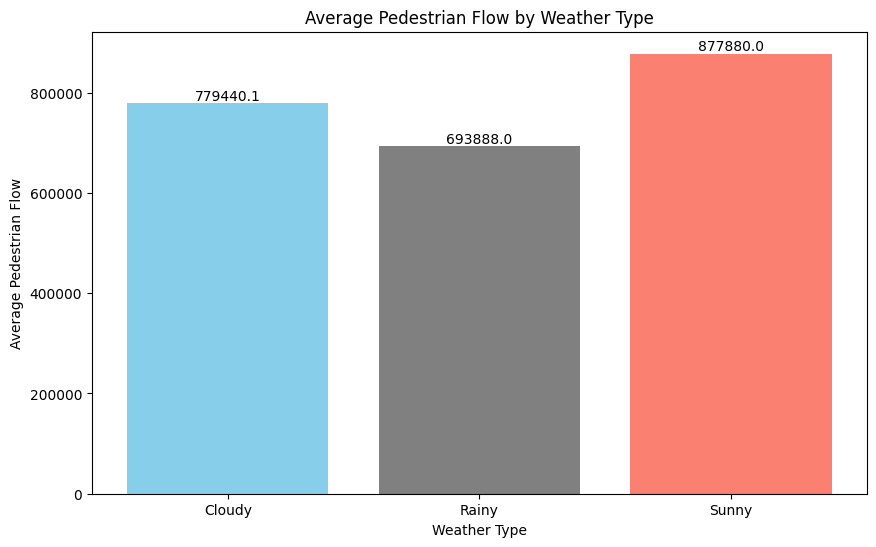

In [28]:
weather_pedestrian = weather_pedestrian_2024.groupby('WeatherType')['Total_of_Directions'].mean().reset_index()

plt.figure(figsize=(10, 6))

# bar chart
bars = plt.bar(weather_pedestrian['WeatherType'], weather_pedestrian['Total_of_Directions'], color=['skyblue', 'grey', 'salmon'])

# data label
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

plt.xlabel('Weather Type')
plt.ylabel('Average Pedestrian Flow')
plt.title('Average Pedestrian Flow by Weather Type')

plt.show()

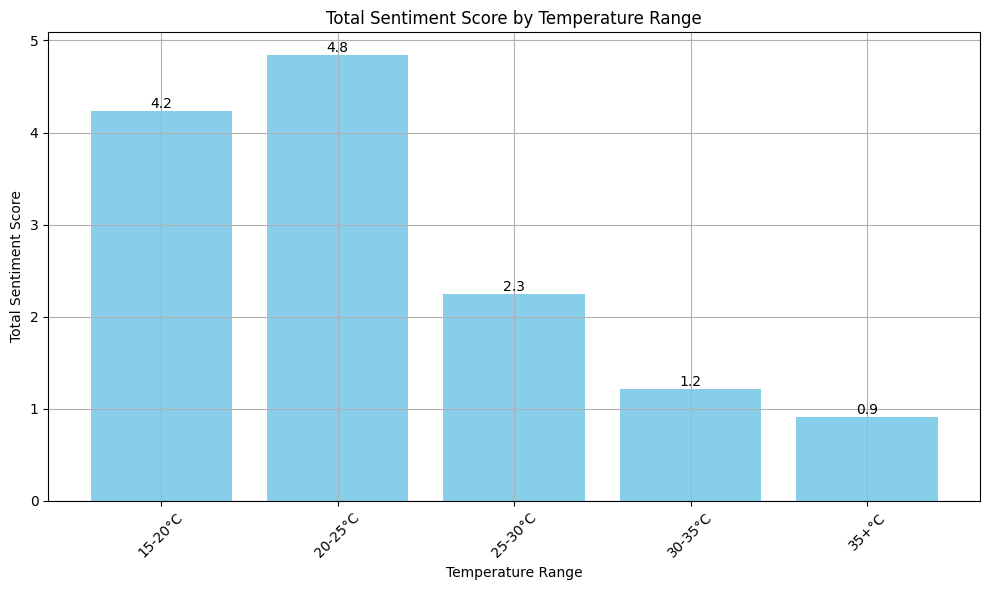

In [37]:
temperature_bins = [15, 20, 25, 30, 35, float('inf')]
temperature_labels = ['15-20°C', '20-25°C', '25-30°C', '30-35°C', '35+°C']


weather_mastodon_df['TemperatureRange'] = pd.cut(weather_mastodon_df['airTemp'], bins=temperature_bins, labels=temperature_labels)

temperature_sentiment_flow = weather_mastodon_df.groupby('TemperatureRange')['sentiment'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(temperature_sentiment_flow['TemperatureRange'], temperature_sentiment_flow['sentiment'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')


plt.xlabel('Temperature Range')
plt.ylabel('Total Sentiment Score')
plt.title('Total Sentiment Score by Temperature Range')
plt.xticks(rotation=45) 
plt.grid(True)  
plt.tight_layout() 

plt.show()

        month  sentiment
0  2023-05-01   0.095715
1  2023-06-01   0.097285
2  2023-07-01   0.102451
3  2023-08-01   0.100368
4  2023-09-01   0.101871
5  2023-10-01   0.100254
6  2023-11-01   0.095011
7  2023-12-01   0.102262
8  2024-01-01   0.101948
9  2024-02-01   0.103544
10 2024-03-01   0.106951
11 2024-04-01   0.103400
12 2024-05-01   0.103255


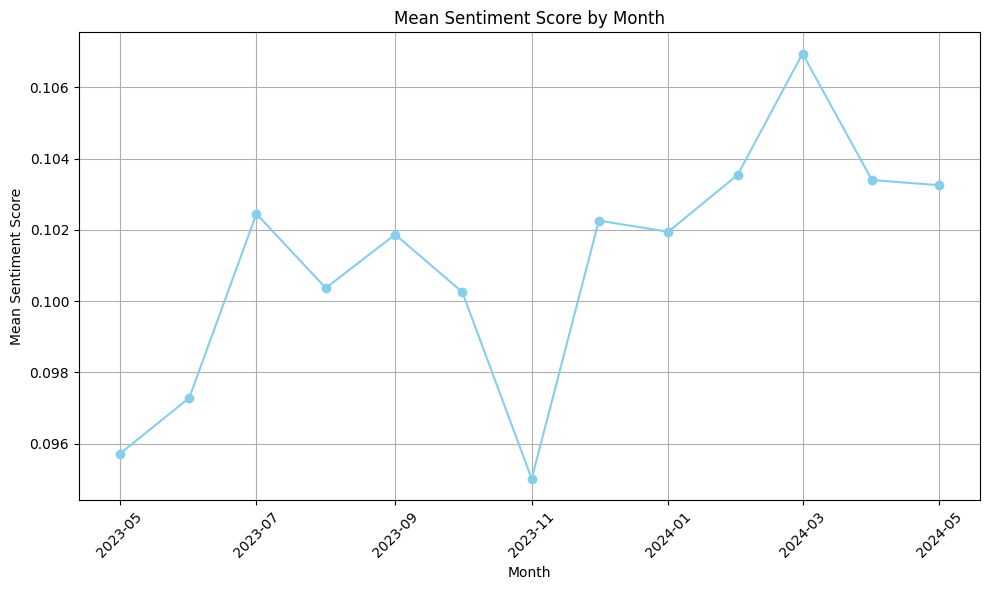

In [21]:
# Extract the month from the datetime column
mastodon_df['month'] = mastodon_df['date'].dt.to_period('M')

# Group by month and calculate the mean sentiment score
monthly_sentiment_mean = mastodon_df.groupby('month')['sentiment'].mean().reset_index()

# Convert the month column to datetime objects for subsequent processing
monthly_sentiment_mean['month'] = monthly_sentiment_mean['month'].dt.to_timestamp()

# Print the summary results
print(monthly_sentiment_mean)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment_mean['month'], monthly_sentiment_mean['sentiment'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Month')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Automatically adjust layout to prevent text overlap
plt.show()

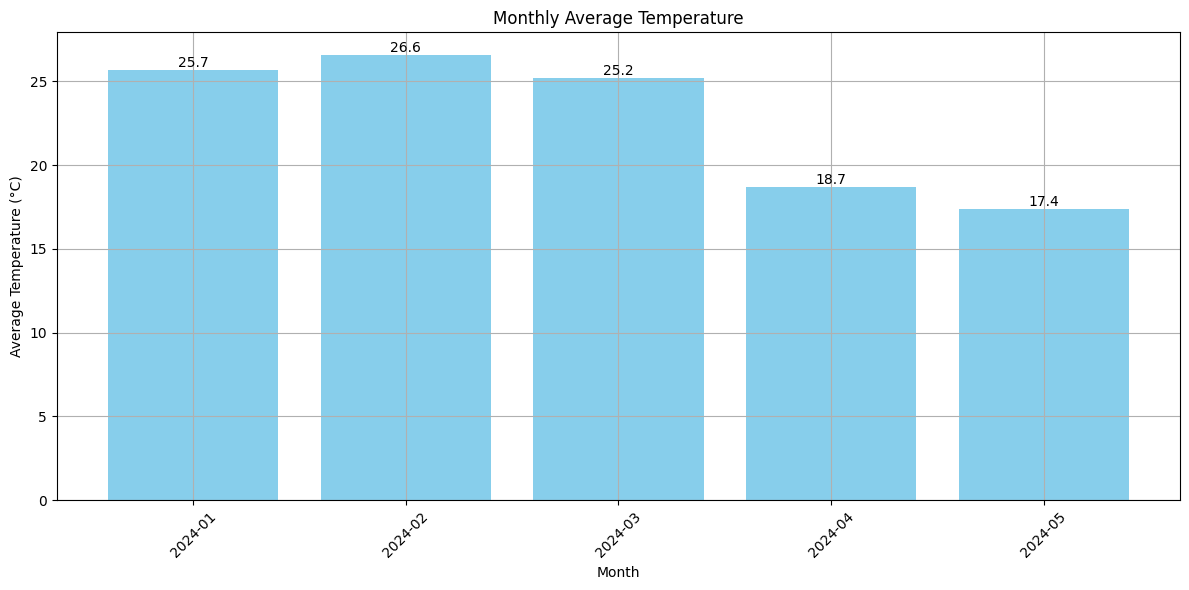

In [34]:
# Convert date column to datetime format and extract month
weather_mastodon_df['Date'] = pd.to_datetime(weather_mastodon_df['date'])
weather_mastodon_df['Month'] = weather_mastodon_df['Date'].dt.to_period('M')

# Calculate average temperature for each month
monthly_temperature = weather_mastodon_df.groupby('Month')['airTemp'].mean().reset_index()

# Convert Period to string
monthly_temperature['Month'] = monthly_temperature['Month'].astype(str)

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_temperature['Month'], monthly_temperature['airTemp'], color='skyblue')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Monthly Average Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingxinli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


day: 10633
new: 9898
one: 9505
like: 8990
good: 7462
get: 7007
work: 6344
well: 5484
first: 5159
make: 5099
australia: 4928
years: 3847
last: 3662
home: 3539
things: 3526
love: 3354
australian: 3275
morning: 3272
old: 3228
game: 3184
i've: 3127
lot: 3112
come: 3020
better: 2996
never: 2967
around: 2949
something: 2947
mean: 2940
many: 2924
hour: 2799


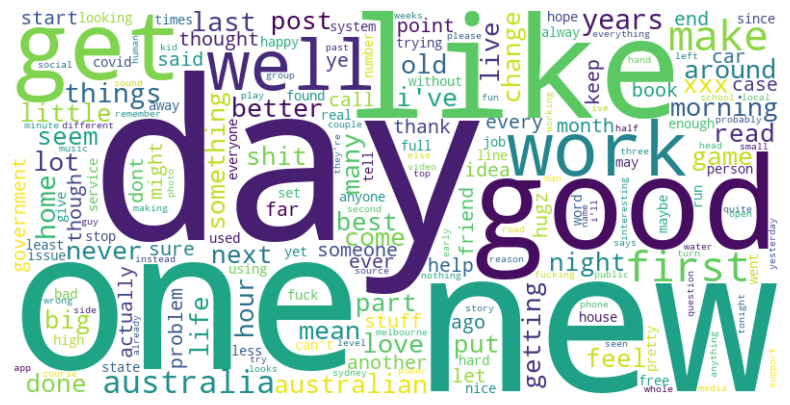

In [38]:
import World_Cloud

World_Cloud.main()